In [39]:
from functools import partial

import torch

def quad(a, b, c, x):
    return a * x * x + b * x + c

def make_quad(a, b, c):
    return partial(quad, a, b, c)

def add_noise(x):
    return x + torch.randn_like(x) * 1.01

def plot_abc(abc, color: str = 'red'):
    f = make_quad(*abc)
    x = torch.linspace(-2, -2, 20)
    plt.grid()
    plt.plot(x, f(x), color=color)

Text(0.5, 1.0, 'MAE: 0.65794')

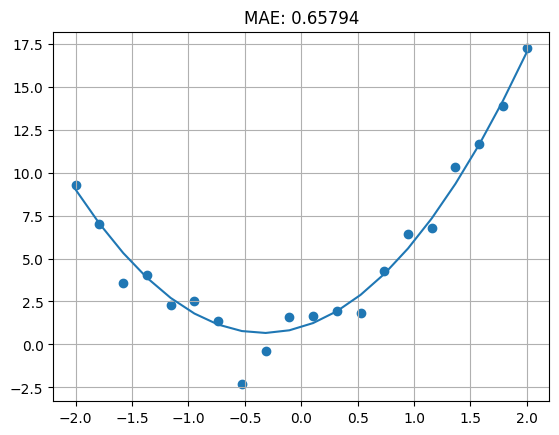

In [40]:
from matplotlib import pyplot as plt

f = make_quad(3, 2, 1)
x = torch.linspace(-2, 2, 20)
model_preds = f(x)
input_labels = add_noise(model_preds)
plt.grid()
plt.scatter(x, input_labels)
plt.plot(x, model_preds)
mae = torch.abs(model_preds - input_labels).mean()
plt.title(f'MAE: {mae:.5f}')

MAE: 2.98749
MAE: 2.96274
MAE: 2.91326
MAE: 2.83903
MAE: 2.74005
MAE: 2.61634
MAE: 2.46788
MAE: 2.29467
MAE: 2.10241
MAE: 1.94646
MAE: 1.79244
MAE: 1.63211
MAE: 1.46805
MAE: 1.34023
MAE: 1.27431
MAE: 1.26723
MAE: 1.28967
MAE: 1.31367
MAE: 1.43625
MAE: 1.63142
MAE: 1.84481
MAE: 2.04664
MAE: 2.21676
MAE: 2.35516
MAE: 2.46184
MAE: 2.53680
MAE: 2.58005
MAE: 2.59158
MAE: 2.57139
MAE: 2.51948
After Training abc = tensor([3.9283, 2.1905, 1.9000], dtype=torch.float64, requires_grad=True)


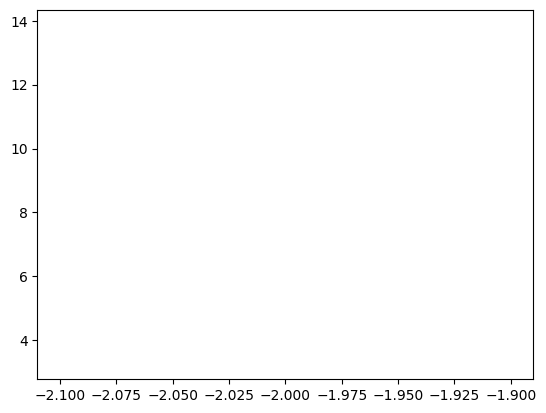

In [42]:
abc = torch.tensor([1.1, 1.1, 1.1], requires_grad=True, dtype=torch.float64)

for e in range(0, 30):
    mae = torch.abs(make_quad(*abc)(x) - input_labels).mean()
    print(f'MAE: {mae:.5f}')
    mae.backward()
    with torch.no_grad():
        plot_abc(abc)
        abc -= abc.grad * 0.01

print(f'After Training abc = {abc}')
